**Task 1**

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import datetime

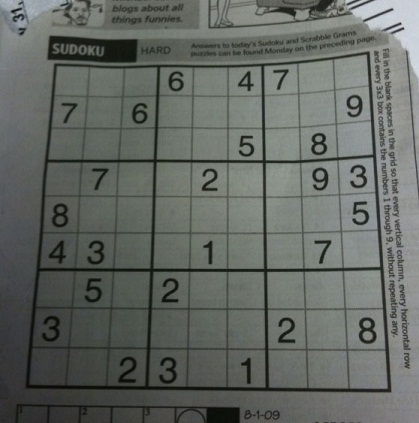

In [2]:
# Load sudoku-original.png image in grayscale mode.

image= cv2.imread("sudoku-original.png")
cv2_imshow(image)

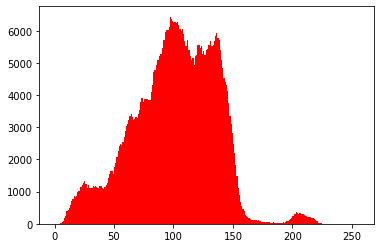

In [3]:
# Histogram of intensities

hoi = plt.hist(image.flatten(),256,[0,256], color = 'r')

In [4]:
image.shape

(423, 419, 3)

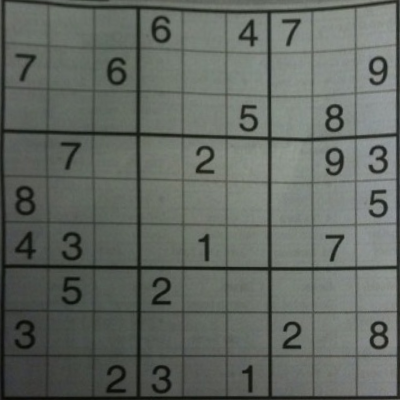

In [5]:
# Perspective Transformation to obtain the sudoku as a proper square

width = 400
height = 400

input = np.float32([[53,65],[369,52],[390,392],[25,387]])
output = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])

matrix = cv2.getPerspectiveTransform(input,output)
imgOutput = cv2.warpPerspective(image, matrix, (width,height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

cv2_imshow(imgOutput)

**Task 2**

In [19]:
# Loaded data
energy_data= pd.read_csv("energydata_complete.csv")

In [20]:
# To have a quick view of the data
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


In [21]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Energy Consumption'],
      dtype='object')

In [22]:
energy_data['Energy Consumption']

0        13.275433
1        18.606195
2        28.642668
3        45.410390
4        10.084097
           ...    
19730    43.096812
19731    49.282940
19732    29.199117
19733     6.322784
19734    34.118851
Name: Energy Consumption, Length: 19735, dtype: float64

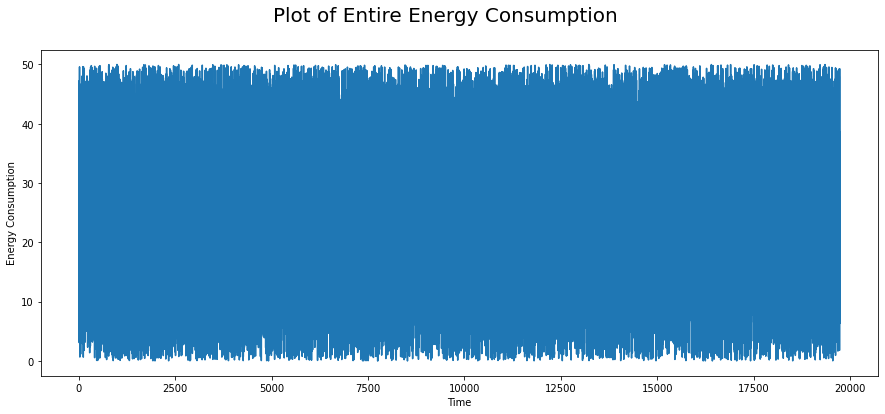

In [24]:
# Plot the appliances energy consumption for whole period

plt.figure(figsize=(15,6))
fig=plt.subplot() 
plt.plot(energy_data["Energy Consumption"])
plt.suptitle('Plot of Entire Energy Consumption', fontsize=20)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Energy Consumption', fontsize=10)
plt.show()

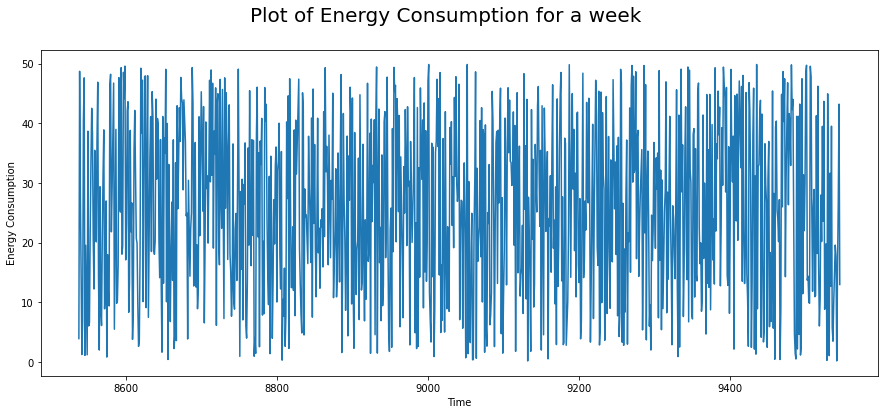

In [29]:
# Plot the appliances energy consumption for a randomly chosen week

a_week = (energy_data['date'] >= "3/11/2016 00:00") & (energy_data['date'] < "3/18/2016 00:00")
energy_data_1week = energy_data.loc[a_week]
plt.figure(figsize=(15,6))
plt.plot(energy_data_1week["Energy Consumption"])
plt.suptitle('Plot of Energy Consumption for a week', fontsize=20)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Energy Consumption', fontsize=10)
plt.show()

In [30]:
# To plot heatmap of hourly consumption of appliances for the randomly chosen week above. 
energy_data_1week["date"]

8538     3/11/2016 0:00
8539     3/11/2016 0:10
8540     3/11/2016 0:20
8541     3/11/2016 0:30
8542     3/11/2016 0:40
             ...       
9541    3/17/2016 23:10
9542    3/17/2016 23:20
9543    3/17/2016 23:30
9544    3/17/2016 23:40
9545    3/17/2016 23:50
Name: date, Length: 1008, dtype: object

In [31]:
energy_data_1week["date"] = pd.to_datetime(energy_data_1week["date"])

energy_data_1week["hour"] = energy_data_1week["date"].dt.hour
energy_data_1week["Day_of_week"] = energy_data_1week["date"].dt.strftime('%a')

In [32]:
energy_data_1week["Day_of_week"]

8538    Fri
8539    Fri
8540    Fri
8541    Fri
8542    Fri
       ... 
9541    Thu
9542    Thu
9543    Thu
9544    Thu
9545    Thu
Name: Day_of_week, Length: 1008, dtype: object

In [33]:
energy_data_1week["hour"] = energy_data_1week["hour"].astype(pd.api.types.CategoricalDtype(categories=list(range(24,0,-1))))
energy_data_1week["Day_of_week"] = energy_data_1week["Day_of_week"].astype(pd.api.types.CategoricalDtype(categories=["Sun","Mon","Tue","Wed","Thu", "Fri", "Sat"]))

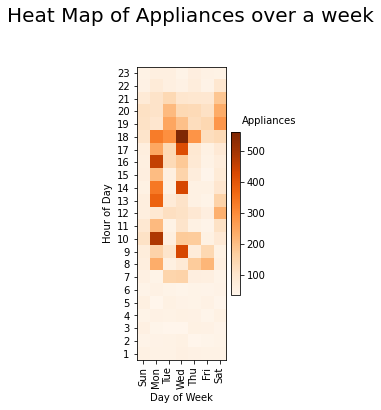

In [45]:
piv = pd.pivot_table(energy_data_1week, values="Appliances",index=["hour"], columns=["Day_of_week"], fill_value=0)

plt.figure(figsize=(2,6))
plt.imshow(piv,cmap="Oranges")
plt.colorbar(shrink=0.5).set_label('Appliances', y=1.1, rotation=360)
plt.suptitle('Heat Map of Appliances over a week', fontsize=20)
plt.xticks(range(len(piv.columns)),piv.columns, rotation=90)
plt.yticks(range(len(piv.index)),piv.index)
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()

In [46]:
# To plot the histogram of energy consumption
energy_data["Energy Consumption"].unique

<bound method Series.unique of 0        13.275433
1        18.606195
2        28.642668
3        45.410390
4        10.084097
           ...    
19730    43.096812
19731    49.282940
19732    29.199117
19733     6.322784
19734    34.118851
Name: Energy Consumption, Length: 19735, dtype: float64>

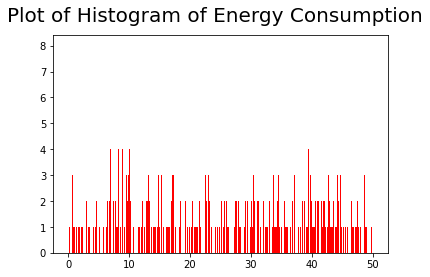

In [48]:
plt.hist(energy_data["Energy Consumption"],19734, color = 'r')
plt.suptitle('Plot of Histogram of Energy Consumption', fontsize=20)
plt.show()

In [49]:
# feature variable NSM (no. of seconds from midnight)
# Brcause it's a 23 Hour format
energy_data["NSM"] = pd.to_datetime(energy_data["date"].map(lambda x: str(x).replace(x[-5:], ' 23:59'))) - pd.to_datetime(energy_data["date"])
energy_data["NSM"] = energy_data["NSM"].map(lambda x: x.total_seconds())+60

In [50]:
# Check
print(energy_data["date"][400])
print(energy_data["NSM"][400])

1/14/2016 11:40
44400.0


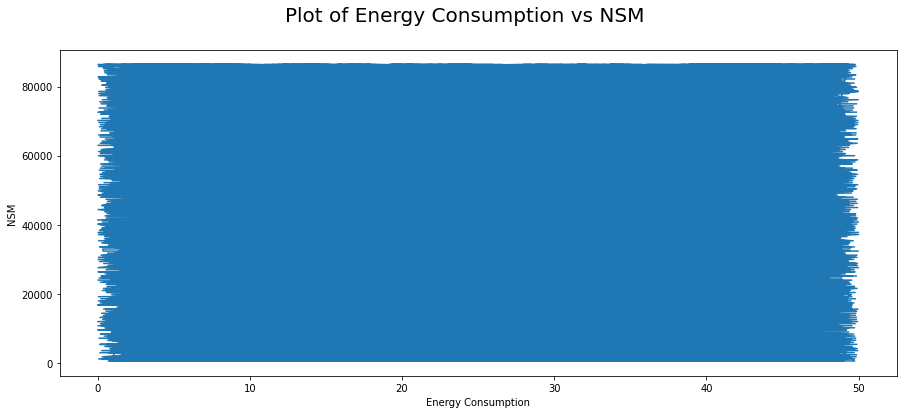

In [52]:
# plot of energy consumption vs. NSM

plt.figure(figsize=(15,6))
plt.plot(energy_data["Energy Consumption"], energy_data["NSM"])
plt.suptitle('Plot of Energy Consumption vs NSM', fontsize=20)
plt.xlabel('Energy Consumption', fontsize=10)
plt.ylabel('NSM', fontsize=10)
plt.show()

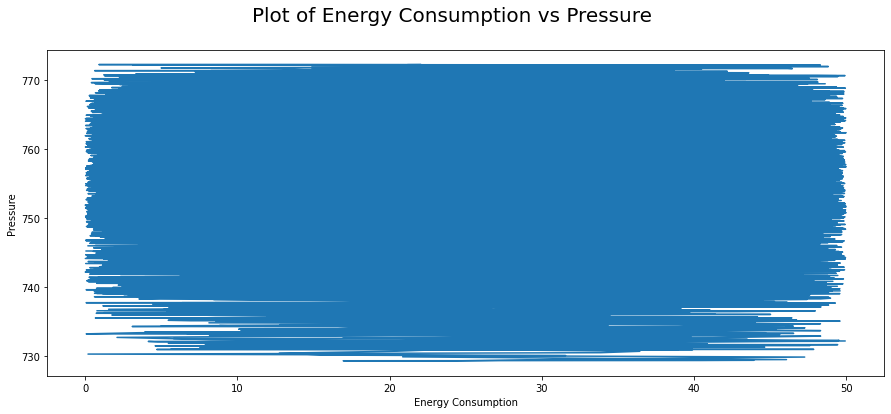

In [53]:
# plot of energy consumption vs Press mm Hg

plt.figure(figsize=(15,6))
plt.plot(energy_data["Energy Consumption"], energy_data["Press_mm_hg"])
plt.suptitle('Plot of Energy Consumption vs Pressure', fontsize=20)
plt.xlabel('Energy Consumption', fontsize=10)
plt.ylabel('Pressure', fontsize=10)
plt.show()

In [ ]:
# It is observed that the major contributing factors for the energy consumption
# among all other features is NSM and Press mm Hg. Comment on it.

In [63]:
import statsmodels.api as sm

X = energy_data.drop('date',axis=1).drop("Energy Consumption", axis=1)
X= (X - X.mean())/X.std()
y =energy_data["Energy Consumption"]
X = sm.add_constant(X) 
 
model = sm.OLS(y, X).fit()
 
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:     Energy Consumption   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9205
Date:                Fri, 11 Feb 2022   Prob (F-statistic):              0.583
Time:                        04:29:59   Log-Likelihood:                -80760.
No. Observations:               19735   AIC:                         1.616e+05
Df Residuals:                   19707   BIC:                         1.618e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.9880      0.103    242.136      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
energy_data.corr()["Energy Consumption"]

Appliances           -0.011145
lights                0.000521
T1                   -0.006203
RH_1                 -0.000699
T2                   -0.011087
RH_2                  0.006275
T3                   -0.005194
RH_3                 -0.000477
T4                   -0.001815
RH_4                 -0.001787
T5                   -0.005490
RH_5                 -0.011056
T6                   -0.015086
RH_6                  0.011671
T7                   -0.003900
RH_7                  0.001820
T8                   -0.003210
RH_8                  0.004480
T9                   -0.001227
RH_9                 -0.002955
T_out                -0.015259
Press_mm_hg           0.000699
RH_out                0.020441
Windspeed            -0.011342
Visibility           -0.005889
Tdewpoint            -0.003950
Energy Consumption    1.000000
NSM                   0.013390
Name: Energy Consumption, dtype: float64

In [ ]:
# Comment: From the coefficients and correlation, NSM and Press mm Hg do not seem to be the most contributing parameters

**Task 3**

In [71]:
# Loaded data

noise_df = pd.read_table("airfoil_self_noise.dat")
noise_df

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [72]:
# naming columns for easy manipulation

noise_df = pd.read_table("airfoil_self_noise.dat",names= ["Frequency","Angle_of_attack","Chord_length","Free_stream_velocity","Suction_side_displacement_thickness","Scaled_sound_pressure_level"])
noise_df

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [73]:
noise_df.describe()

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [77]:
# mean

noise_df.mean(axis=0)

Frequency                              2886.380572
Angle_of_attack                           6.782302
Chord_length                              0.136548
Free_stream_velocity                     50.860745
Suction_side_displacement_thickness       0.011140
Scaled_sound_pressure_level             124.835943
dtype: float64

In [78]:
# Standard deviation

noise_df.std(axis=0)

Frequency                              3152.573137
Angle_of_attack                           5.918128
Chord_length                              0.093541
Free_stream_velocity                     15.572784
Suction_side_displacement_thickness       0.013150
Scaled_sound_pressure_level               6.898657
dtype: float64

In [79]:
# median

noise_df.median(axis=0)

Frequency                              1600.000000
Angle_of_attack                           5.400000
Chord_length                              0.101600
Free_stream_velocity                     39.600000
Suction_side_displacement_thickness       0.004957
Scaled_sound_pressure_level             125.721000
dtype: float64

In [81]:
# Kurtosis 

noise_df.kurtosis(axis=0)

Frequency                              5.708685
Angle_of_attack                       -0.412951
Chord_length                          -1.037964
Free_stream_velocity                  -1.563951
Suction_side_displacement_thickness    2.218903
Scaled_sound_pressure_level           -0.314187
dtype: float64

In [82]:
# Skew

noise_df.skew(axis=0)

Frequency                              2.137084
Angle_of_attack                        0.689164
Chord_length                           0.457457
Free_stream_velocity                   0.235852
Suction_side_displacement_thickness    1.702165
Scaled_sound_pressure_level           -0.418952
dtype: float64

In [83]:
# Range

stat = noise_df.describe()
for col in stat.columns:
  print("The range for {0} is {1:.4f}".format(col,stat[col]["max"] - stat[col]["min"] ))

The range for Frequency is 19800.0000
The range for Angle_of_attack is 22.2000
The range for Chord_length is 0.2794
The range for Free_stream_velocity is 39.6000
The range for Suction_side_displacement_thickness is 0.0580
The range for Scaled_sound_pressure_level is 37.6070
